In [4]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [5]:
covid_df = pd.read_csv('WorldMeter13_Jan_20201A.csv')
covid_df.dtypes

#                         object
Country, Other            object
Total Cases               object
New Cases                 object
Total Deaths              object
New Deaths                object
Total Recovered           object
Active Cases              object
Serious, Critical         object
Total Cases per 1M pop    object
Deaths per 1M pop         object
Total Tests               object
Tests per 1M pop          object
Population                object
dtype: object

In [6]:
#covid_df.dropna(inplace = True)
#before=covid_df.dtypes

In [7]:
#covid_df["Total Tests"] = covid_df["Total Tests"].astype(int)

In [8]:
#print(type(covid_df))
covid_df.tail()


,#,"Country, Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,"Serious, Critical",Total Cases per 1M pop,Deaths per 1M pop,Total Tests,Tests per 1M pop,Population
198,113,Madagascar,"18,001",NaN,267,NaN,"17,447",287,16,641,10,"102,830","3,664","28,065,975"
199,156,Niger,"3,969",NaN,135,NaN,"2,507","1,327",3,161,5,"67,052","2,719","24,664,421"
200,168,Yemen,"2,107",NaN,612,NaN,"1,416",79,23,70,20,"17,404",577,"30,172,929"
201,\r,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,NaN,Total:,"92,414,520","418,662","1,978,954","10,040","66,054,534","24,381,032","110,689","11,855.90",253.9,NaN,NaN,NaN


In [9]:
covid_df=covid_df.apply(lambda x: x.str.replace(',',''))

In [10]:
covid_df.info()
covid_df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   #                       202 non-null    object
 1   Country, Other          202 non-null    object
 2   Total Cases             202 non-null    object
 3   New Cases               120 non-null    object
 4   Total Deaths            188 non-null    object
 5   New Deaths              87 non-null     object
 6   Total Recovered         199 non-null    object
 7   Active Cases            199 non-null    object
 8   Serious, Critical       145 non-null    object
 9   Total Cases per 1M pop  202 non-null    object
 10  Deaths per 1M pop       188 non-null    object
 11  Total Tests             201 non-null    object
 12  Tests per 1M pop        201 non-null    object
 13  Population              201 non-null    object
dtypes: object(14)
memory usage: 22.3+ KB


,#,"Country, Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,"Serious, Critical",Total Cases per 1M pop,Deaths per 1M pop,Total Tests,Tests per 1M pop,Population
198,113,Madagascar,18001,NaN,267,NaN,17447,287,16,641,10,102830,3664,28065975
199,156,Niger,3969,NaN,135,NaN,2507,1327,3,161,5,67052,2719,24664421
200,168,Yemen,2107,NaN,612,NaN,1416,79,23,70,20,17404,577,30172929
201,\r,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202,NaN,Total:,92414520,418662,1978954,10040,66054534,24381032,110689,11855.90,253.9,NaN,NaN,NaN


In [11]:
covid_df=covid_df.apply(lambda x: pd.to_numeric(x,errors='ignore'))
#pd.to_numeric(covid_df)
covid_df.shape
#covid_df.info()
#covid_df.tail()

(203, 14)

In [12]:

covid_df['Total Tests'].describe()

count    2.010000e+02
mean     6.619139e+06
std      2.723159e+07
min      6.260000e+02
25%      7.676300e+04
50%      5.733330e+05
75%      3.064639e+06
max      2.759259e+08
Name: Total Tests, dtype: float64

In [13]:
covid_df.describe()

,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,"Serious, Critical",Total Cases per 1M pop,Deaths per 1M pop,Total Tests,Tests per 1M pop,Population
count,2.020000e+02,120.000000,1.880000e+02,87.000000,1.990000e+02,1.990000e+02,145.000000,202.000000,188.000000,2.010000e+02,2.010000e+02,2.010000e+02
mean,9.140025e+05,6963.533333,2.101827e+04,230.195402,6.620680e+05,2.282583e+05,1526.406897,19057.068812,344.709574,6.619139e+06,4.118378e+05,3.712032e+07
std,6.755514e+06,38821.571101,1.483012e+05,1099.666163,4.851283e+06,1.854085e+06,9528.442352,22202.630229,417.729949,2.723159e+07,1.152016e+06,1.460064e+08
min,4.000000e+00,1.000000,1.000000e+00,1.000000,1.000000e+00,0.000000e+00,1.000000,6.000000,0.200000,6.260000e+02,5.770000e+02,3.533000e+03
25%,3.490750e+03,92.000000,6.675000e+01,7.000000,2.250500e+03,2.595000e+02,10.000000,1381.000000,24.750000,7.676300e+04,3.895400e+04,6.957640e+05
50%,2.891500e+04,680.000000,5.235000e+02,25.000000,2.009900e+04,3.504000e+03,68.000000,10425.000000,170.500000,5.733330e+05,1.439050e+05,5.874894e+06
75%,2.137615e+05,2446.500000,4.417250e+03,83.500000,1.444835e+05,2.458800e+04,356.000000,30325.250000,500.000000,3.064639e+06,3.880420e+05,2.466442e+07
max,9.241452e+07,418662.000000,1.978954e+06,10040.000000,6.605453e+07,2.438103e+07,110689.000000,114029.000000,1914.000000,2.759259e+08,1.435283e+07,1.439324e+09


 This method calculates the Pearson correlation coefficient between the two columns. This coefficient is a number between -1 and 1. A 1 means that a strong relationship exists, a -1 means that a strong negative relationship exists, and a 0 means that there is no relationship at all.

In [14]:
covid_df['Tests per 1M pop'].corr(covid_df['Total Cases per 1M pop'])

0.33044405287109585

In [15]:
covid_df[['Tests per 1M pop', 'Total Cases per 1M pop', 'Deaths per 1M pop']].corr()

,Tests per 1M pop,Total Cases per 1M pop,Deaths per 1M pop
Tests per 1M pop,1.000000,0.330444,0.073993
Total Cases per 1M pop,0.330444,1.000000,0.788400
Deaths per 1M pop,0.073993,0.788400,1.000000


In [16]:
covidtest_df=covid_df.sort_values(by='Tests per 1M pop', ascending=False)
covidtest_df.tail(20)

,#,"Country, Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,"Serious, Critical",Total Cases per 1M pop,Deaths per 1M pop,Total Tests,Tests per 1M pop,Population
183,178,Burundi,1019.0,NaN,2.0,NaN,773.0,244.0,NaN,84.0,0.2,90019.0,7454.0,12076732.0
184,152,CAR,4973.0,NaN,63.0,NaN,4885.0,25.0,2.0,1020.0,13.0,35523.0,7288.0,4874274.0
185,158,South Sudan,3670.0,NaN,63.0,NaN,3181.0,426.0,1.0,326.0,6.0,80036.0,7106.0,11263567.0
186,139,Mali,7687.0,NaN,303.0,NaN,5354.0,2030.0,NaN,374.0,15.0,136739.0,6652.0,20557328.0
187,170,Eritrea,1596.0,NaN,6.0,NaN,934.0,656.0,NaN,447.0,2.0,23693.0,6632.0,3572503.0
188,204,Macao,46.0,NaN,NaN,NaN,46.0,0.0,NaN,70.0,NaN,4238.0,6480.0,654039.0
189,211,Solomon Islands,17.0,NaN,NaN,NaN,10.0,7.0,NaN,24.0,NaN,4500.0,6468.0,695764.0
190,181,Taiwan,842.0,4.0,7.0,NaN,731.0,104.0,NaN,35.0,0.3,133617.0,5605.0,23839869.0
191,92,Afghanistan,53774.0,84.0,2317.0,9.0,44850.0,6607.0,693.0,1365.0,59.0,219861.0,5581.0,39391241.0
192,105,Cameroon,27336.0,NaN,451.0,NaN,24892.0,1993.0,46.0,1016.0,17.0,149000.0,5540.0,26894127.0


In [17]:
covidtest_df = covidtest_df[covidtest_df['Tests per 1M pop'].notna()]
covidtest_df = covidtest_df[covidtest_df['Total Cases per 1M pop'].notna()]
covidtest_df = covidtest_df[covidtest_df['Deaths per 1M pop'].notna()]

In [18]:
print(covidtest_df.shape)
H_test = covidtest_df.iloc[0:61]
print(H_test.shape)
M_test = covid_df.iloc[61:122]
print(M_test.shape)
L_test = covid_df.iloc[122:232]
print(L_test.shape)

(187, 14)
(61, 14)
(61, 14)
(81, 14)


In [19]:
M_test.fillna(M_test.mean(), inplace=True)
L_test.fillna(M_test.mean(), inplace=True)

/Users/vahida/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


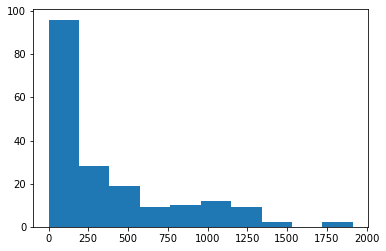

In [20]:
plt.hist(covidtest_df['Deaths per 1M pop'])
plt.show()

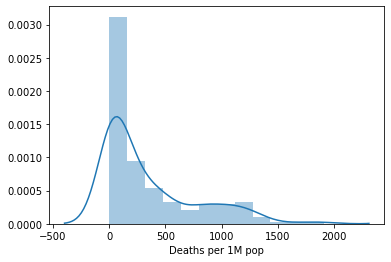

In [21]:
ax = sns.distplot(covidtest_df['Deaths per 1M pop'])

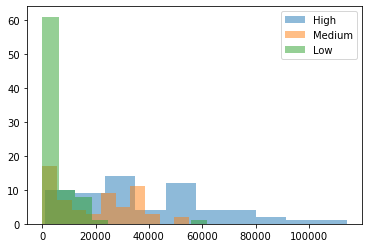

In [22]:
plt.hist(H_test['Total Cases per 1M pop'], alpha = .5, label = "High")
plt.hist(M_test['Total Cases per 1M pop'], alpha = .5, label = "Medium")
plt.hist(L_test['Total Cases per 1M pop'], alpha = .5, label = "Low")
plt.legend(loc="upper right")
plt.show()

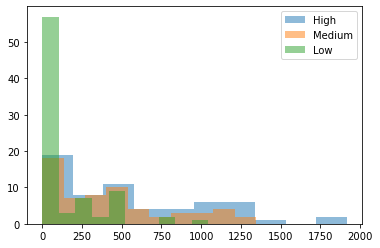

In [23]:
plt.hist(H_test['Deaths per 1M pop'], alpha = .5, label = "High")
plt.hist(M_test['Deaths per 1M pop'], alpha = .5, label = "Medium")
plt.hist(L_test['Deaths per 1M pop'], alpha = .5, label = "Low")
plt.legend(loc="upper right")
plt.show()

In [24]:
print(stats.describe(H_test['Deaths per 1M pop']))
print(stats.describe(M_test['Deaths per 1M pop']))
print(stats.describe(L_test['Deaths per 1M pop']))

DescribeResult(nobs=61, minmax=(1.0, 1914.0), mean=554.5573770491803, variance=235644.8508196721, skewness=0.8154267025213013, kurtosis=-0.23031313534159725)
DescribeResult(nobs=61, minmax=(0.6, 1345.0), mean=423.52857142857135, variance=143531.90190476188, skewness=0.8484500174660172, kurtosis=-0.3601419275981024)
DescribeResult(nobs=81, minmax=(0.2, 1046.0), mean=134.64814814814815, variance=42113.09534920635, skewness=2.2220254534944455, kurtosis=5.33775273848898)


In [25]:
print(stats.kruskal(H_test['Deaths per 1M pop'], M_test['Deaths per 1M pop'], L_test['Deaths per 1M pop']))

KruskalResult(statistic=51.62456958685288, pvalue=6.164064137026368e-12)


In [26]:
print(stats.mannwhitneyu(x=H_test['Deaths per 1M pop'], y=L_test['Deaths per 1M pop']))
print(stats.mannwhitneyu(x=H_test['Deaths per 1M pop'], y=M_test['Deaths per 1M pop']))
print(stats.mannwhitneyu(x=M_test['Deaths per 1M pop'], y=L_test['Deaths per 1M pop']))

MannwhitneyuResult(statistic=884.5, pvalue=3.187761115398622e-11)
MannwhitneyuResult(statistic=1595.5, pvalue=0.08780196092065667)
MannwhitneyuResult(statistic=1155.5, pvalue=3.016145066573074e-08)
